In [1]:
import pandas as pd
import pickle
from scipy import stats
import pandas as pd
import seaborn as sns
from cliffs_delta import cliffs_delta

In [2]:
# load data
final = pickle.load(open("../00_data/final/incorrect_answers.pkl", "rb"))

In [3]:
# define low and high performers
final = final.sort_values(by=["prop_fehler"])
n = 10
high_performer = final.head(int(len(final) * (n / 100)))

final = final.sort_values(by=["prop_fehler"], ascending=False)
low_performer = final.head(int(len(final) * (n / 100)))

In [4]:
# split by intervention group
low_intvcontrol = low_performer[(low_performer["interventiongroup"] == "control")]
low_intv2 = low_performer[(low_performer["interventiongroup"] == "2")]
low_intv3 = low_performer[(low_performer["interventiongroup"] == "3")]
low_intv4 = low_performer[(low_performer["interventiongroup"] == "4")]
low_intv5 = low_performer[(low_performer["interventiongroup"] == "5")]
low_intv6 = low_performer[(low_performer["interventiongroup"] == "6")]

high_intvcontrol = high_performer[(high_performer["interventiongroup"] == "control")]
high_intv2 = high_performer[(high_performer["interventiongroup"] == "2")]
high_intv3 = high_performer[(high_performer["interventiongroup"] == "3")]
high_intv4 = high_performer[(high_performer["interventiongroup"] == "4")]
high_intv5 = high_performer[(high_performer["interventiongroup"] == "5")]
high_intv6 = high_performer[(high_performer["interventiongroup"] == "6")]

<AxesSubplot:xlabel='prop_fehler', ylabel='Count'>

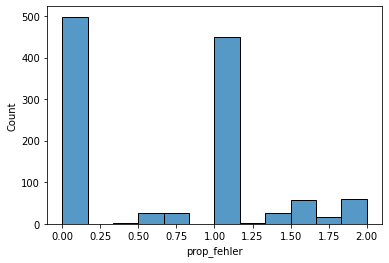

In [5]:
# plot high performer
sns.histplot(data=high_performer, x="prop_fehler")

<AxesSubplot:xlabel='prop_fehler', ylabel='Count'>

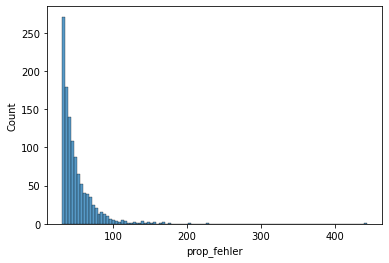

In [6]:
# plot low performer
sns.histplot(data=low_performer, x="prop_fehler")

Get mean and median

In [7]:
# median high performer
prop_fehler_by_group = high_performer.groupby(["interventiongroup"]).agg(
    {"prop_fehler": "median", "Geschlecht": "count"}
)
prop_fehler_by_group = prop_fehler_by_group.rename(columns={"Geschlecht": "count"})

In [8]:
# median low performer
prop_fehler_by_group = low_performer.groupby(["interventiongroup"]).agg(
    {"prop_fehler": "median", "Geschlecht": "count"}
)
prop_fehler_by_group = prop_fehler_by_group.rename(columns={"Geschlecht": "count"})

In [9]:
# mean high performer
prop_fehler_by_group = high_performer.groupby(["interventiongroup"]).agg(
    {"prop_fehler": "mean", "Geschlecht": "count"}
)
prop_fehler_by_group = prop_fehler_by_group.rename(columns={"Geschlecht": "count"})

In [10]:
# mean low performer
prop_fehler_by_group = low_performer.groupby(["interventiongroup"]).agg(
    {"prop_fehler": "mean", "Geschlecht": "count"}
)
prop_fehler_by_group = prop_fehler_by_group.rename(columns={"Geschlecht": "count"})

Test significance

In [11]:
# Kruskal Wallis Test
stats.kruskal(
    high_intvcontrol["prop_fehler"],
    high_intv2["prop_fehler"],
    high_intv3["prop_fehler"],
    high_intv4["prop_fehler"],
    high_intv5["prop_fehler"],
    high_intv6["prop_fehler"],
)

KruskalResult(statistic=7.758488473753268, pvalue=0.1700576960340036)

In [12]:
# Kruskal Wallis Test
stats.kruskal(
    low_intvcontrol["prop_fehler"],
    low_intv2["prop_fehler"],
    low_intv3["prop_fehler"],
    low_intv4["prop_fehler"],
    low_intv5["prop_fehler"],
    low_intv6["prop_fehler"],
)

KruskalResult(statistic=17.390322251776183, pvalue=0.0038160501845791593)

Wilcoxon Mann Whitney Tests and Cliffs Delta (# thresholds: .11 (small), .28 (medium), .43 (large))

In [13]:
# control group
groups = [low_intv2, low_intv3, low_intv4, low_intv5, low_intv6]
for x in groups:
    print(stats.mannwhitneyu(low_intvcontrol["prop_fehler"], x["prop_fehler"]))
    print(cliffs_delta(low_intvcontrol["prop_fehler"], x["prop_fehler"])[0])

MannwhitneyuResult(statistic=28064.0, pvalue=0.0958279164893418)
0.09296257350936636
MannwhitneyuResult(statistic=31700.0, pvalue=0.491969779291655)
0.03626943005181347
MannwhitneyuResult(statistic=31184.0, pvalue=0.9038139462582084)
-0.006341012650160915
MannwhitneyuResult(statistic=32923.0, pvalue=0.9052567366372368)
-0.0061431180474846424
MannwhitneyuResult(statistic=17466.5, pvalue=0.0002922710881275544)
0.2522583882993978


In [14]:
# Intv 2
groups = [low_intv3, low_intv4, low_intv5, low_intv6]
for x in groups:
    print(stats.mannwhitneyu(low_intv2["prop_fehler"], x["prop_fehler"]))
    print(cliffs_delta(low_intv2["prop_fehler"], x["prop_fehler"])[0])

MannwhitneyuResult(statistic=14798.0, pvalue=0.3861398634563086)
-0.05341265272180643
MannwhitneyuResult(statistic=14455.0, pvalue=0.10712400899802098)
-0.09870308018456167
MannwhitneyuResult(statistic=15221.0, pvalue=0.09553653646594609)
-0.10089196054108335
MannwhitneyuResult(statistic=8297.0, pvalue=0.032299664535873025)
0.16400112233445566


In [15]:
# Intv 3
groups = [low_intv4, low_intv5, low_intv6]
for x in groups:
    print(stats.mannwhitneyu(low_intv3["prop_fehler"], x["prop_fehler"]))
    print(cliffs_delta(low_intv3["prop_fehler"], x["prop_fehler"])[0])

MannwhitneyuResult(statistic=18318.5, pvalue=0.48056033018862376)
-0.04126759826241692
MannwhitneyuResult(statistic=19324.5, pvalue=0.4685673215329893)
-0.0418474353571163
MannwhitneyuResult(statistic=10359.5, pvalue=0.0031136884340739867)
0.21991285916156383


In [16]:
# Intv 4
print(stats.mannwhitneyu(low_intv4["prop_fehler"], low_intv5["prop_fehler"]))
print(cliffs_delta(low_intv4["prop_fehler"], low_intv5["prop_fehler"])[0])
print(stats.mannwhitneyu(low_intv4["prop_fehler"], low_intv6["prop_fehler"]))
print(cliffs_delta(low_intv4["prop_fehler"], low_intv6["prop_fehler"])[0])

MannwhitneyuResult(statistic=20681.0, pvalue=0.9936091087209694)
-0.00048330191870861726
MannwhitneyuResult(statistic=10931.0, pvalue=0.0005865431835781151)
0.25470615243342515


In [17]:
# Intv 5
print(stats.mannwhitneyu(low_intv5["prop_fehler"], low_intv6["prop_fehler"]))
print(cliffs_delta(low_intv5["prop_fehler"], low_intv6["prop_fehler"])[0])

MannwhitneyuResult(statistic=11591.5, pvalue=0.0003933672739926183)
0.26049369290996083


<AxesSubplot:xlabel='prop_fehler', ylabel='interventiongroup'>

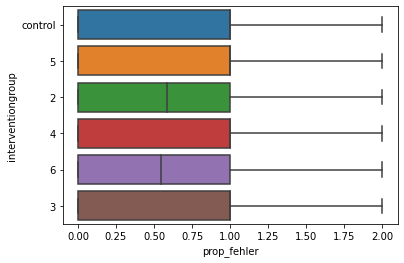

In [18]:
sns.boxplot(
    data=high_performer, x="prop_fehler", y="interventiongroup", showfliers=False
)  # ,hue='Geschlecht'

<AxesSubplot:xlabel='prop_fehler', ylabel='interventiongroup'>

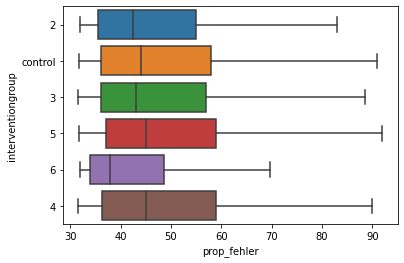

In [19]:
sns.boxplot(
    data=low_performer, x="prop_fehler", y="interventiongroup", showfliers=False
)  # ,hue='Geschlecht'